<a href="https://colab.research.google.com/github/SurabhiSharma-hub/Suru-puddle/blob/main/data_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.getcwd()
current_working_directory = os.getcwd()
print(f"Current working directory: {current_working_directory}")

# Change the current working directory to the directory containing the file
os.chdir("/content")
data= ("/content/SOIL_LEDS_DATA_Zn.xlsx")
# Read the file into a Pandas DataFrame
df = pd.read_excel('/content/SOIL_LEDS_DATA_Zn.xlsx')


df.info()
df.head()

Current working directory: /content
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   L1 (mV)    25 non-null     float64
 1   L2         25 non-null     float64
 2   L3         25 non-null     float64
 3   L4         25 non-null     float64
 4   L5         25 non-null     float64
 5   L6         25 non-null     float64
 6   L7         25 non-null     float64
 7   L8         25 non-null     float64
 8   L9         25 non-null     float64
 9   Target_Zn  25 non-null     float64
dtypes: float64(10)
memory usage: 2.1 KB


,L1 (mV),L2,L3,L4,L5,L6,L7,L8,L9,Target_Zn
0,15.80,14.27,16.20,70.07,70.67,76.13,77.93,67.00,66.33,1.968534
1,20.87,15.33,18.93,63.87,64.73,69.40,70.33,61.40,60.80,1.226813
2,21.53,16.67,22.60,63.20,64.07,69.00,70.47,61.20,60.33,1.485303
3,21.93,15.27,20.53,61.73,62.33,68.00,69.40,59.93,59.07,2.115298
4,20.80,15.40,17.93,64.87,65.13,70.07,71.27,62.00,61.87,0.576947


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   L1 (mV)    25 non-null     float64
 1   L2         25 non-null     float64
 2   L3         25 non-null     float64
 3   L4         25 non-null     float64
 4   L5         25 non-null     float64
 5   L6         25 non-null     float64
 6   L7         25 non-null     float64
 7   L8         25 non-null     float64
 8   L9         25 non-null     float64
 9   Target_Zn  25 non-null     float64
dtypes: float64(10)
memory usage: 2.1 KB
None

First few rows:
   L1 (mV)     L2     L3     L4     L5     L6     L7     L8     L9  Target_Zn
0    15.80  14.27  16.20  70.07  70.67  76.13  77.93  67.00  66.33   1.968534
1    20.87  15.33  18.93  63.87  64.73  69.40  70.33  61.40  60.80   1.226813
2    21.53  16.67  22.60  63.20  64.07  69.00  70.47  61.20  60.33   1.485303
3    21.93  15.27  20.53  61.73

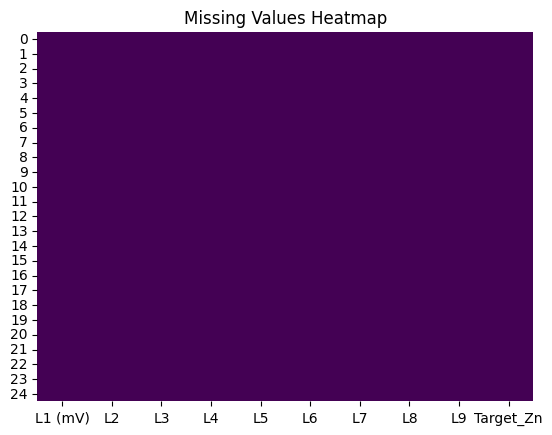


Duplicate Rows:
0


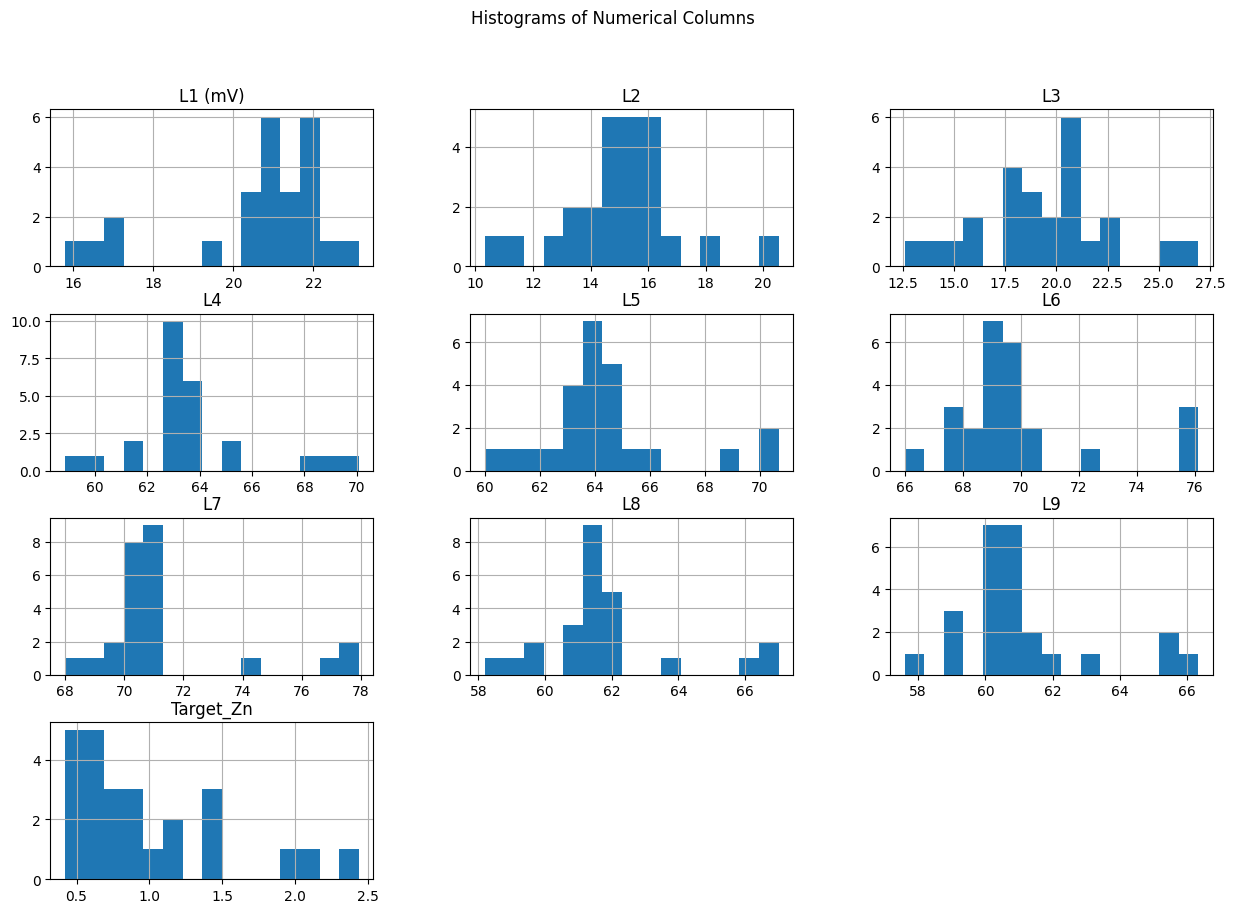

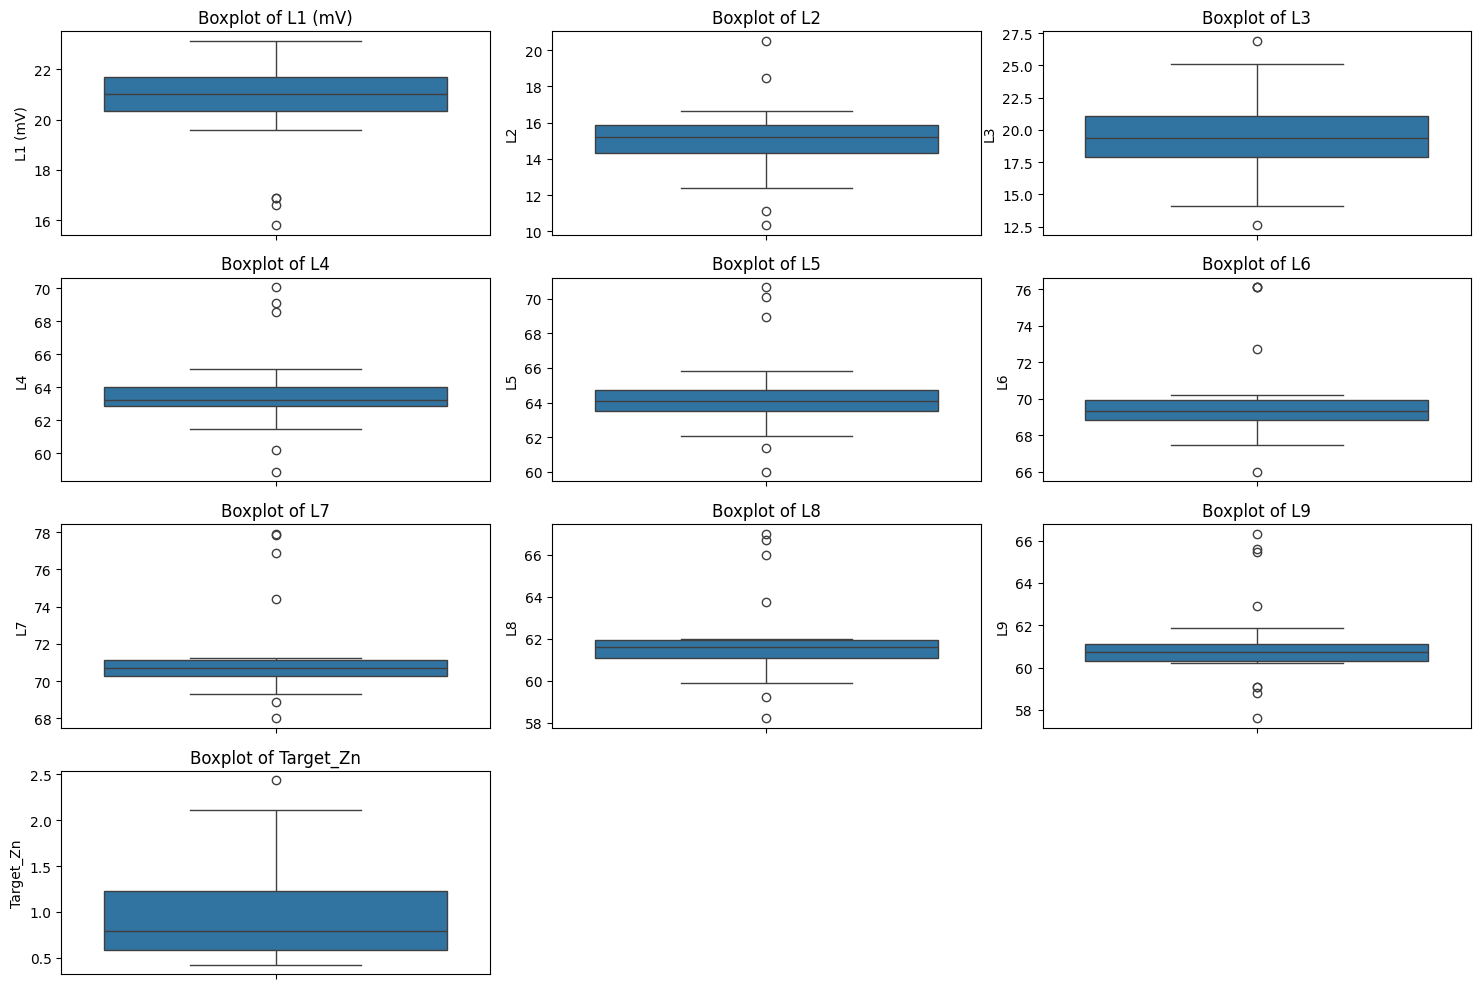

In [2]:
# check missing values in data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

df = pd.read_excel("/content/SOIL_LEDS_DATA_Zn.xlsx")

#1. Inspect the data
print("Data Info:")
print(df.info())
print("\nFirst few rows:")
print(df.head())

# 2. Summary statistics
print("\nSummary Statistics:")
print(df.describe(include='all'))

# 3. Missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Visualize missing values
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# 4. Duplicate rows
print("\nDuplicate Rows:")
print(df.duplicated().sum())

# 5. Unique values in categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nUnique values in {col}:")
    print(df[col].value_counts())

# 6. Data visualization
# Histograms for numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns
df[numerical_columns].hist(bins=15, figsize=(15, 10), layout=(len(numerical_columns) // 3 + 1, 3))
plt.suptitle('Histograms of Numerical Columns')
plt.show()

#boxplots for numerical columns to identify outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns) // 3 + 1, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


Dropping Columns for Zn

In [3]:
df1=df.drop(['L2','L3','L5','L6','L8','L9'], axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   L1 (mV)    25 non-null     float64
 1   L4         25 non-null     float64
 2   L7         25 non-null     float64
 3   Target_Zn  25 non-null     float64
dtypes: float64(4)
memory usage: 928.0 bytes


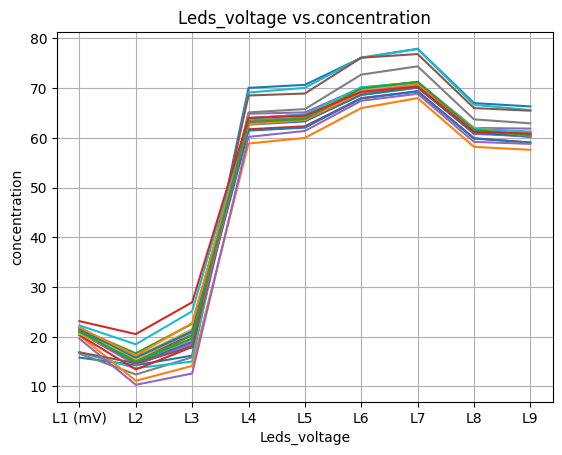

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_excel("/content/SOIL_LEDS_DATA_Zn.xlsx")

# Extract leds and conc columns
conc= data.columns[:-1] # Convert column names to strings and store in a list  # Assuming the last column is the target variable
# leds_voltage= data.iloc[:, :-1].values  # Exclude the target variable
leds_voltage= data.drop(columns="Target_Zn").values


for i in range(len(leds_voltage)):
   plt.plot(conc,leds_voltage[i])

plt.title("Leds_voltage vs.concentration")
plt.xlabel("Leds_voltage")
plt.ylabel("concentration")

plt.grid(True)
plt.show()

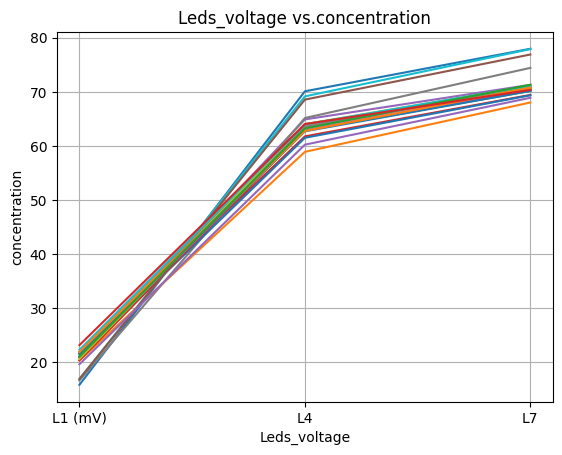

,L1 (mV),L4,L7,Target_Zn
0,15.80,70.07,77.93,1.968534
1,20.87,63.87,70.33,1.226813
2,21.53,63.20,70.47,1.485303
3,21.93,61.73,69.40,2.115298
4,20.80,64.87,71.27,0.576947


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('/content/SOIL_LEDS_DATA_Zn.xlsx')
c1=df.drop(['L2','L3','L5','L6','L8','L9'], axis=1)
# Extract LEDs and Conc columns
conc= c1.columns[:-1] # Convert column names to strings and store in a list  # last column is the target variable
#leds_voltage = data.iloc[:, :-1].values  # Exclude the target variable
leds_voltage= c1.drop(columns="Target_Zn").values



for i in range(len(leds_voltage)):
   plt.plot(conc,leds_voltage[i])

plt.title("Leds_voltage vs.concentration")
plt.xlabel("Leds_voltage")
plt.ylabel("concentration")

plt.grid(True)
plt.show()
c1.head()


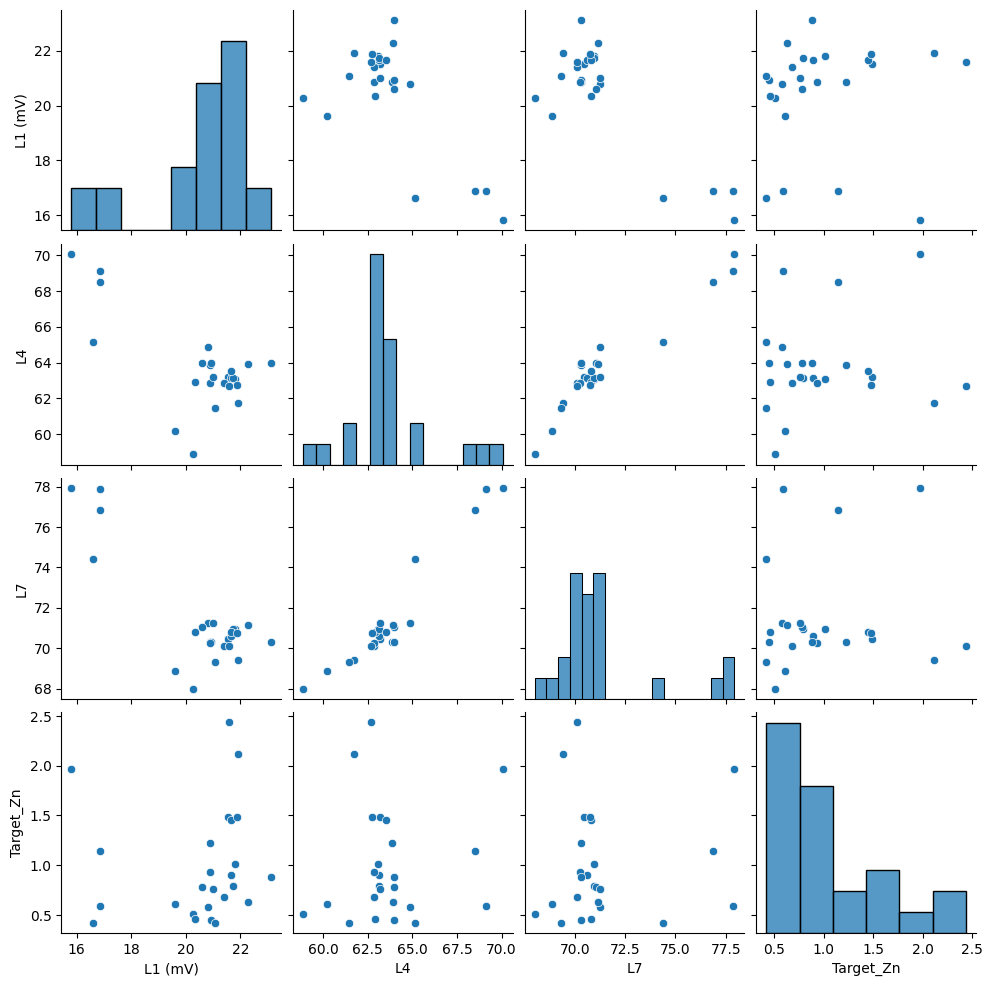

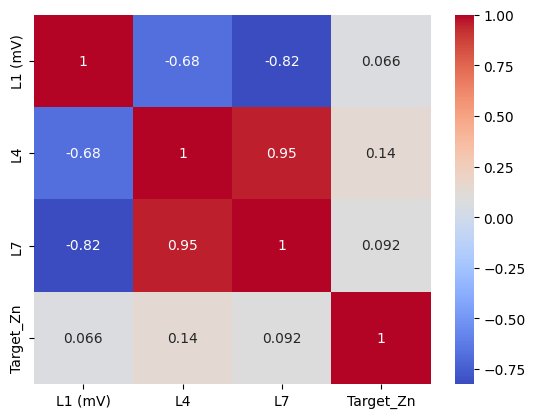

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot to see relationships between variables
sns.pairplot(c1)
plt.show()

# Correlation matrix to understand relationships between features
correlation_matrix = c1.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [32]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
#df = pd.read_csv("/content/Housing.csv")

# Convert boolean columns to integers
#bool_cols = df.select_dtypes(include=['float64']).columns
#df[bool_cols] = df[bool_cols].astype(int)

# One-Hot Encode categorical variables and drop the first level to avoid dummy variable trap
dummy_df = pd.get_dummies(c1, drop_first=True)

# Identify numerical columns again after one-hot encoding
numerical_cols = dummy_df.select_dtypes(include=['float64']).columns

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numerical columns
scaled_data = scaler.fit_transform(dummy_df[numerical_cols])

# Create a DataFrame with the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=numerical_cols)

# Concatenate scaled numerical columns and one-hot encoded categorical columns
final_df = pd.concat([dummy_df.drop(columns=numerical_cols), scaled_df], axis=1)

# Display the final dataframe
final_df.head()
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   L1 (mV)    25 non-null     float64
 1   L4         25 non-null     float64
 2   L7         25 non-null     float64
 3   Target_Zn  25 non-null     float64
dtypes: float64(4)
memory usage: 928.0 bytes


In [103]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X=c1.drop('Target_Zn',axis=1)
y=c1['Target_Zn']

print('shape of X= ',X.shape)
print('shape of y= ',y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=51)

print('shape of X_train= ',X_train.shape)
print('shape of y_train= ',y_train.shape)
print('shape of X_test= ',X_test.shape)
print('shape of y_test= ',y_test.shape)

#Random forest Regression

rg =RandomForestRegressor(n_estimators=100,criterion='squared_error')
rg.fit(X_train,y_train)
rg.score(X_test, y_test)
print('R^2 is ' + str(rg.score(X_test, y_test)) + ' for Random Forest Regression')



c=X_test.iloc[-1,:]
rg.predict([c])
y_test.iloc[-1]
y_pred=rg.predict(X_test)
y_pred

shape of X=  (25, 3)
shape of y=  (25,)
shape of X_train=  (20, 3)
shape of y_train=  (20,)
shape of X_test=  (5, 3)
shape of y_test=  (5,)
R^2 is 0.17691946392739055 for Random Forest Regression


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([0.89111816, 0.87756678, 1.24972341, 1.2933775 , 1.19229203])

In [3]:
import pandas as pd


df = pd.read_excel('/content/SOIL_LEDS_DATA_Zn.xlsx')
c1=df.drop(['L2','L3','L5','L6','L8','L9'], axis=1)
c1.head()



,L1 (mV),L4,L7,Target_Zn
0,15.80,70.07,77.93,1.968534
1,20.87,63.87,70.33,1.226813
2,21.53,63.20,70.47,1.485303
3,21.93,61.73,69.40,2.115298
4,20.80,64.87,71.27,0.576947


In [4]:
X=c1.drop('Target_Zn',axis=1)
y=c1['Target_Zn']

print('shape of X=',X.shape)
print('shape of y=',y.shape)

shape of X= (25, 3)
shape of y= (25,)


In [17]:
!pip install scikit-learn
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor


#models=[LinearRegression(),LogisticRegressionCV(),SVR(),KNeighborsRegressor(),RandomForestRegressor()]
'''
def compare_models_cross_validation():
  for model in models:
    cv_score=cross_val_score(model,X,y,cv=5)
    mean_accuracy=sum(cv_score)/len(cv_score)
    mean_accuracy=mean_accuracy*100
    print("cross validation accuries for",model,"-",cv_score)
    print("accuracy % of",model,mean_accuracy)
compare_models_cross_validation()'''

df = pd.read_excel('/content/SOIL_LEDS_DATA_Zn.xlsx')
c1=df.drop(['L2','L3','L5','L6','L8','L9'], axis=1)
c1.head()
X=c1.drop('Target_Zn',axis=1)
y=c1['Target_Zn']

print('shape of X=',X.shape)
print('shape of y=',y.shape)
cv_score_lr=cross_val_score(LinearRegression(),X,y,cv=5)
print(cv_score_lr)
mean_accuracy_lr=sum(cv_score_lr)/len(cv_score_lr)
print(mean_accuracy_lr)

shape of X= (25, 3)
shape of y= (25,)
[-1.6316009  -5.38184423 -5.10039362 -0.67766485 -0.20914361]
-2.600129441094132


In [18]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=51)

print('shape of X_train =',X_train.shape)
print('shape of X_test =',X_test.shape)
print('shape of y_train =',y_train.shape)
print('shape of y_test =',y_test.shape)



shape of X_train = (20, 3)
shape of X_test = (5, 3)
shape of y_train = (20,)
shape of y_test = (5,)


In [19]:
#Feature Scalling

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train=sc.transform(X_train)
X_test=sc.transform(X_test)
X_train

#Min-Max Scalling

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled


array([[0.78361669, 0.44642857, 0.2346425 ],
       [1.        , 0.45178571, 0.31520645],
       [0.88562597, 0.38660714, 0.24874119],
       [0.69088099, 0.        , 0.        ],
       [0.92735703, 0.375     , 0.29506546],
       [0.94744977, 0.25535714, 0.14098691],
       [0.70015456, 0.3625    , 0.28197382],
       [0.77279753, 0.53571429, 0.32930514],
       [0.16537867, 0.8625    , 0.89325277],
       [0.9072643 , 0.41607143, 0.28197382],
       [0.86553323, 0.35714286, 0.21450151],
       [0.74034003, 0.45803571, 0.30916415],
       [0.78361669, 0.35714286, 0.2286002 ],
       [0.9381762 , 0.34464286, 0.27492447],
       [0.80370943, 0.38660714, 0.32930514],
       [0.91653787, 0.38035714, 0.29506546],
       [0.58732612, 0.11875   , 0.08761329],
       [0.16537867, 0.91607143, 0.9939577 ],
       [0.        , 1.        , 1.        ],
       [0.79289026, 0.45803571, 0.2346425 ]])

In [20]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
rfe = RFE(model, n_features_to_select=5)
X_reduced = rfe.fit_transform(X_train_scaled, y_train)

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = RandomForestRegressor(random_state=42)
model.fit(X_reduced, y_train)
y_pred = model.predict(X_test_scaled[:, rfe.get_support()])

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')



Mean Squared Error: 0.45888343404937154
R² Score: 0.1681453025979205


In [10]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming X_train and X_test are already defined
sc = StandardScaler()
sc.fit(X_train)
X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

# Compute the minimum value in the transformed training data
min_value = np.min(X_train_scaled)

# Shift the data to make all values positive
shift = -min_value
X_train_positive = X_train_scaled + shift
X_test_positive = X_test_scaled + shift

# Verify that all values are now positive
print("X_train (positive values):", X_train_positive)
print("X_test (positive values):", X_test_positive)


X_train (positive values): [[2.84334283 2.62054038 2.18317726]
 [3.62848681 2.6433596  2.48115788]
 [3.21348214 2.36572568 2.23532386]
 [2.50685256 0.71893815 1.3153087 ]
 [3.36490276 2.31628402 2.40666272]
 [3.43780899 1.80665462 1.83677478]
 [2.54050159 2.26303916 2.35824087]
 [2.80408564 3.00086082 2.53330449]
 [0.60007433 4.39283365 4.61916883]
 [3.29199654 2.49123142 2.35824087]
 [3.14057591 2.24021993 2.1086821 ]
 [2.68631404 2.66998203 2.45880933]
 [2.84334283 2.24021993 2.16082871]
 [3.40415996 2.18697507 2.33216757]
 [2.91624906 2.36572568 2.53330449]
 [3.32564556 2.33910325 2.40666272]
 [2.13110508 1.22476434 1.63936262]
 [0.60007433 4.62102592 4.99164461]
 [0.         4.97852714 5.01399315]
 [2.87699186 2.66998203 2.18317726]]
X_test (positive values): [[0.4486537  3.09974414 3.69915366]
 [2.95550626 1.70777131 1.81070148]
 [4.11078954 2.66998203 2.18317726]
 [3.29199654 2.33910325 2.28374572]
 [3.25273934 2.16415584 2.1086821 ]]


In [11]:
from sklearn.feature_selection import mutual_info_regression

mutual_info=mutual_info_regression(X_train,y_train)
mutual_info

array([0, 0, 0])

In [9]:
# Feature Selection
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
ordered_rank_features=SelectKBest(score_func=chi2,k=3)
ordered_feature=ordered_rank_features.fit(X_train,y_train)
ordered_features.scores_

ValueError: Input X must be non-negative.

In [14]:
import pandas as pd


AttributeError: module 'pandas' has no attribute 'series'

In [9]:
from sklearn.cross_decomposition import PLSRegression

pls=PLSRegression(n_components=2)
pls.fit(X_train,y_train)
pls.score(X_test,y_test)

0.04377145490954204

In [21]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(X_train,y_train)

lr.coef_
lr.intercept_

0.9824593241979979

In [22]:
X_test[0,:]
lr.predict([X_test[0,:]])
lr.predict(X_test)

array([0.89842934, 0.85249782, 1.11786891, 1.0123819 , 0.96674397])

In [23]:
lr.score(X_test,y_test)

0.0412459858902835

In [95]:
from sklearn.svm import SVR

svr_l=SVR(kernel='rbf')
svr_l.fit(X_train,y_train)
svr_l.score(X_test,y_test)

0.10912631827495034

In [101]:
from sklearn.tree import DecisionTreeRegressor

dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)
dt.score(X_test,y_test)

0.23407517569112102

In [126]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=100,criterion='squared_error')
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.24663796629781232

In [24]:
from sklearn.neighbors import KNeighborsRegressor

kn=KNeighborsRegressor(n_neighbors=2)
kn.fit(X_train,y_train)
kn.score(X_test,y_test)

-0.10477938769669248

In [27]:

import pandas as pd

# Load the data
data= pd.read_excel("/content/SOIL_LEDS_DATA_Zn.xlsx")

# Display the first few rows of the dataset
data.head()
c1=data.drop(['L2','L3','L5','L6','L8','L9'], axis=1)
c1.head()

,L1 (mV),L4,L7,Target_Zn
0,15.80,70.07,77.93,1.968534
1,20.87,63.87,70.33,1.226813
2,21.53,63.20,70.47,1.485303
3,21.93,61.73,69.40,2.115298
4,20.80,64.87,71.27,0.576947


In [29]:
# Check for missing values
print(data.isnull().sum())

# Fill or drop missing values
data.fillna(method='ffill', inplace=True)


L1 (mV)      0
L2           0
L3           0
L4           0
L5           0
L6           0
L7           0
L8           0
L9           0
Target_Zn    0
dtype: int64


In [31]:
# Separate features and target
X = data.drop(columns=['Target_Zn'])
y = data['Target_Zn']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)

from sklearn.metrics import mean_squared_error, r2_score

def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    return mse_train, mse_test, r2_train, r2_test

models = {
    'Linear Regression': lr_model
}

for name, model in models.items():
    mse_train, mse_test, r2_train, r2_test = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test)
    print(f"{name} - Train MSE: {mse_train}, Test MSE: {mse_test}, Train R²: {r2_train}, Test R²: {r2_test}")


Linear Regression - Train MSE: 0.23263586485989235, Test MSE: 0.5414515813300323, Train R²: 0.24555230154138386, Test R²: -1.165794845271134


In [45]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
lr_model=LinearRegression()
X_train_scaled = scaler.fit_transform(X_train)
grid_search = GridSearchCV(estimator=lr_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

print(f'Best parameters: {grid_search.best_params_}')
best_lr_model = grid_search.best_estimator_
lr_pred_tuned = best_lr_model.predict(X_test_scaled)

lr_mse_tuned = mean_squared_error(y_test, lr_pred_tuned)
lr_r2_tuned = r2_score(y_test, lr_pred_tuned)
print(f'Tuned Random Forest - Mean Squared Error: {lr_mse_tuned}')
print(f'Tuned Random Forest - R² Score: {lr_r2_tuned}')


Fitting 5 folds for each of 108 candidates, totalling 540 fits


ValueError: Invalid parameter 'max_depth' for estimator LinearRegression(). Valid parameters are: ['copy_X', 'fit_intercept', 'n_jobs', 'positive'].

In [56]:
from sklearn.model_selection import GridSearchCV
# Define the parameter grid for Linear Regression
param_grid = {
'fit_intercept': [True, False]
}
# Create a Linear Regression model
lr_model = LinearRegression()
X_train_scaled= scaler.fit_transform(X_train)
# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=lr_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and best estimator
print(f'Best parameters: {grid_search.best_params_}')
best_lr_model = grid_search.best_estimator_

# Make predictions with the best model
lr_pred_tuned = best_lr_model.predict(X_test_scaled)


best_model = best_lr_model  # or any other model that performed best
y_pred = best_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')



Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best parameters: {'fit_intercept': True}
Mean Squared Error: 0.5414515813300323
R² Score: -1.165794845271134


In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score

# Load the data

data= pd.read_excel("/content/SOIL_LEDS_DATA_Zn.xlsx")
data.head()
c1=data.drop(['L2','L3','L5','L6','L8','L9'], axis=1)
c1.head()

X = c1.drop(columns=['Target_Zn'])
y = c1['Target_Zn']

X.fillna(method='ffill', inplace=True)

# Feature Engineering: Polynomial Features
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_poly = poly.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Apply Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dimensionality Reduction: PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Define models to try
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# Perform Grid Search with Cross-Validation for each model
param_grids = {
    'Linear Regression': {
        'fit_intercept': [True, False]
    },
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.05],
        'max_depth': [3, 5, 7]
    }
}

# Evaluate each model
for name, model in models.items():
    print(f"Evaluating {name}...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[name], cv=5, n_jobs=-1, verbose=2)
    grid_search.fit(X_train_pca, y_train)

    print(f'Best parameters for {name}: {grid_search.best_params_}')
    best_model = grid_search.best_estimator_

    # Make predictions with the best model
    y_pred = best_model.predict(X_test_pca)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'{name} - Mean Squared Error: {mse}')
    print(f'{name} - R² Score: {r2}\n')



Evaluating Linear Regression...
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best parameters for Linear Regression: {'fit_intercept': True}
Linear Regression - Mean Squared Error: 0.5253022621460854
Linear Regression - R² Score: -1.101197910938955

Evaluating Random Forest...
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Random Forest - Mean Squared Error: 0.48082634174540095
Random Forest - R² Score: -0.9232951723304994

Evaluating Gradient Boosting...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Gradient Boosting - Mean Squared Error: 0.5512315607515672
Gradient Boosting - R² Score: -1.2049145555986716

